In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('bank-full.csv', delimiter=';', quotechar='"')

In [24]:
df.head() ;
df.info();
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
df.isnull().sum() 
##null value check

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [25]:

##replace unknown values to get better results
df['contact'].replace('unknown', df['contact'].mode()[0], inplace=True)
df['poutcome'].replace('unknown', df['poutcome'].mode()[0], inplace=True)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,cellular,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,cellular,5,may,198,1,-1,0,unknown,no


In [26]:

##unneccesery field with lots of unknown values

df=df.drop(['poutcome'], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,cellular,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,cellular,5,may,198,1,-1,0,no


In [27]:
## Implement Z-score for Handle outliers
from scipy import stats
import numpy as np

numeric_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
df_numeric = df[numeric_cols]

z_scores = np.abs(stats.zscore(df_numeric))

df_clean = df[(z_scores < 3).all(axis=1)]
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,cellular,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,cellular,5,may,198,1,-1,0,no


In [28]:
##encode yes-no rows to 0-1

df_clean['default'] = df_clean['default'].map({'yes': 1, 'no': 0})
df_clean['housing'] = df_clean['housing'].map({'yes': 1, 'no': 0})
df_clean['loan'] = df_clean['loan'].map({'yes': 1, 'no': 0})
df_clean['y'] = df_clean['y'].map({'yes': 1, 'no': 0})
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,cellular,5,may,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,cellular,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,cellular,5,may,76,1,-1,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,cellular,5,may,92,1,-1,0,0
4,33,unknown,single,unknown,0,1,0,0,cellular,5,may,198,1,-1,0,0


In [29]:
# Dump unnnecessery rows 
df_clean = pd.get_dummies(df_clean, columns=['job', 'marital', 'education', 'contact', 'month'])
df_clean.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
# Check for duplicate value
print(df_clean.duplicated().sum())


0


In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40209 entries, 0 to 45209
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  40209 non-null  int64
 1   default              40209 non-null  int64
 2   balance              40209 non-null  int64
 3   housing              40209 non-null  int64
 4   loan                 40209 non-null  int64
 5   day                  40209 non-null  int64
 6   duration             40209 non-null  int64
 7   campaign             40209 non-null  int64
 8   pdays                40209 non-null  int64
 9   previous             40209 non-null  int64
 10  y                    40209 non-null  int64
 11  job_admin.           40209 non-null  uint8
 12  job_blue-collar      40209 non-null  uint8
 13  job_entrepreneur     40209 non-null  uint8
 14  job_housemaid        40209 non-null  uint8
 15  job_management       40209 non-null  uint8
 16  job_retired          4

In [32]:
# To get better correlation_matrix values

correlation_matrix = df_clean.corr()
columns_to_display = ['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'y']
rows_to_display = ['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'y']


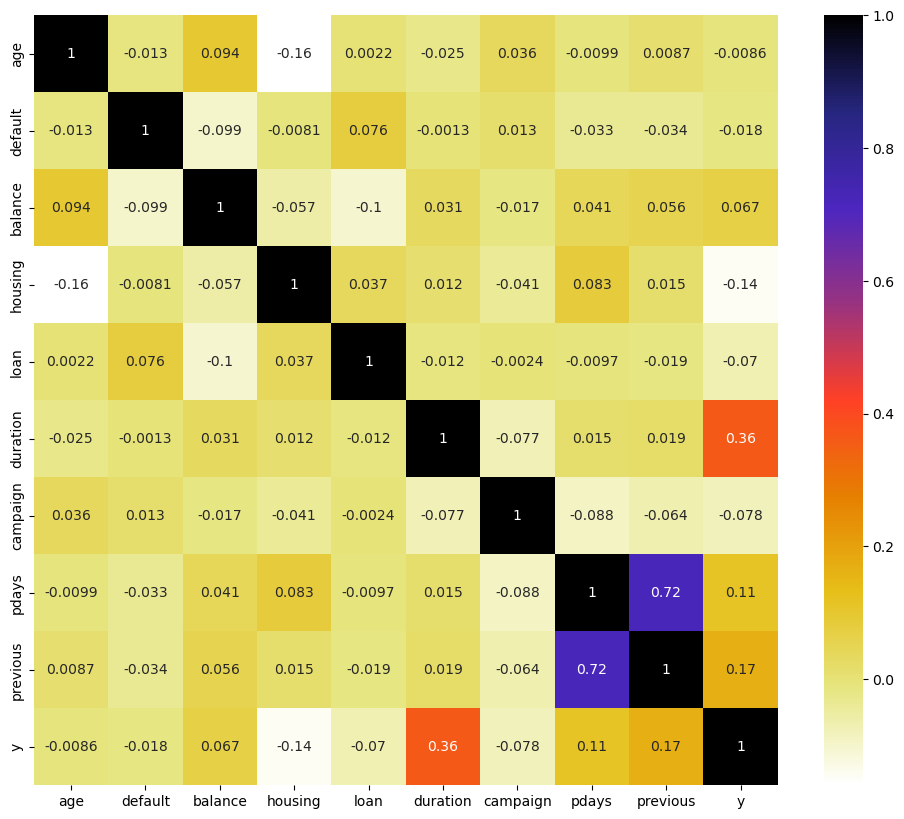

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
filtered_matrix = correlation_matrix.loc[rows_to_display, columns_to_display]

sns.heatmap(filtered_matrix, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [34]:
## Remove one of two features that have a correlation higher than 0.9 or -0.9

columns = np.full((correlation_matrix.shape[0],), True, dtype=bool)
for i in range(correlation_matrix.shape[0]):
    for j in range(i+1, correlation_matrix.shape[0]):
        if correlation_matrix.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df_clean.columns[columns]
df_clean = df_clean[selected_columns]


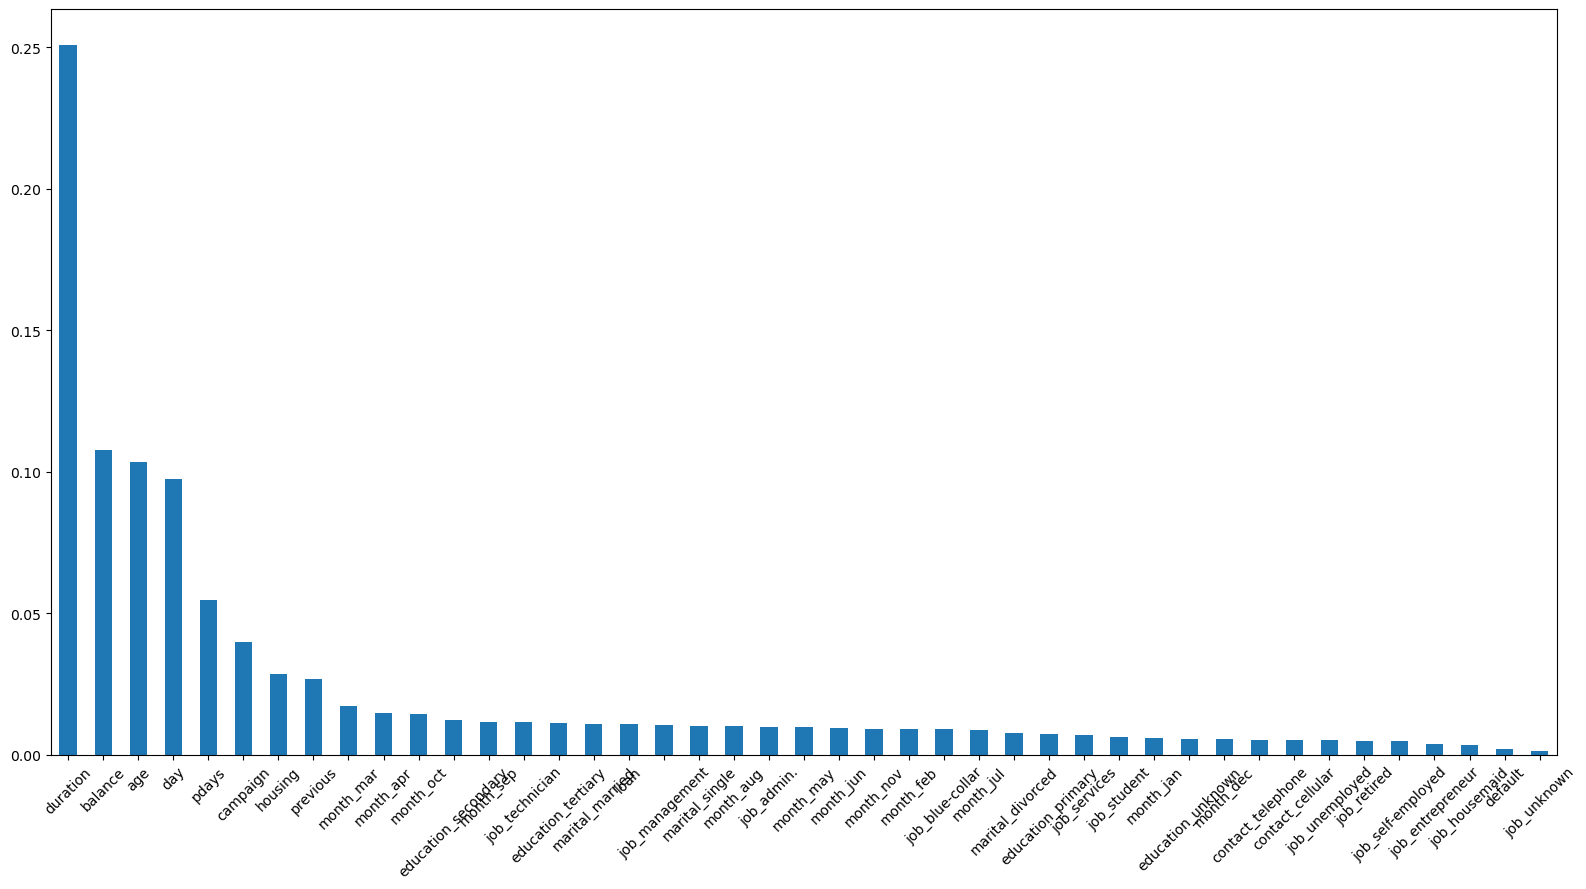

In [36]:
## Implement Feature Importance using Tree-Based Classifiers for get view of more informative to less informative columns
from sklearn.ensemble import RandomForestClassifier

X = df_clean.drop('y', axis=1)
y = df_clean['y']

clf = RandomForestClassifier()

clf.fit(X, y)

importances = clf.feature_importances_

f_importances = pd.Series(importances, X.columns)

f_importances.sort_values(ascending=False, inplace=True)

f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45)

plt.tight_layout()
plt.show()

In [39]:
## Search for best model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from math import sqrt
from sklearn.metrics import mean_squared_error
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Neural Network": MLPClassifier()
}

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through the models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f'{model_name} RMSE: {rmse:.2f}')
    print("\n")


Training Logistic Regression...
Accuracy: 0.9013926883859736
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7215
           1       0.56      0.20      0.29       827

    accuracy                           0.90      8042
   macro avg       0.74      0.59      0.62      8042
weighted avg       0.88      0.90      0.88      8042

Logistic Regression RMSE: 0.31


Training Random Forest...
Accuracy: 0.9095996020890326
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7215
           1       0.64      0.28      0.39       827

    accuracy                           0.91      8042
   macro avg       0.78      0.63      0.67      8042
weighted avg       0.89      0.91      0.89      8042

Random Forest RMSE: 0.30


Training Support Vector Machine...
Accuracy: 0.897164884357125
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      721

In [42]:

## Implement Random Forest and find best parameters with GridSearch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                          cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best parameters found: ", best_params)

best_rf_model = RandomForestClassifier(**best_params)

best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)


Fitting 3 folds for each of 810 candidates, totalling 2430 fits
Best parameters found:  {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [50]:
## Use best parameters For our Dataset
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Oversample dataset with SMOTE to improve performance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

rfc = RandomForestClassifier(n_estimators=500, max_depth=30, min_samples_split=2,
                             min_samples_leaf=1, max_features='auto', random_state=42)

rfc.fit(X_resampled, y_resampled)


y_pred = rfc.predict(X_test)
auc_roc = metrics.roc_auc_score(y_test, y_pred)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

print("AUC-ROC:", auc_roc)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.9073613528972893
Precision: 0.5810276679841897
Recall: 0.3555018137847642
F1 Score: 0.4411102775693923
AUC-ROC: 0.6630592922007674
Confusion Matrix:
 [[7003  212]
 [ 533  294]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7215
           1       0.58      0.36      0.44       827

    accuracy                           0.91      8042
   macro avg       0.76      0.66      0.70      8042
weighted avg       0.89      0.91      0.90      8042

